In [193]:
import numpy as np
import pandas as pd
import datetime
import operator
df = pd.read_csv('C:\\Vimal Anand\\loads_final.csv', parse_dates=["collection_date","delivery_date"])
#df = df[df.collection_longitude < -1.5]
#df = df[df.collection_longitude > -3.5]
#df = df[df.collection_latitude < 60]
#df = df[df.collection_latitude > 55]
#df = df[:100]
#df = df[df.collection_date > ('2015-10-06 11:00:00')]
X = np.array(list(zip(df['collection_longitude'], df['collection_latitude'])))
len(df)

81671

In [194]:
from sklearn.cluster import KMeans, MiniBatchKMeans
def k_means(X, n):
    # kmeans = KMeans(n_clusters=n)
    mbk = MiniBatchKMeans(n_clusters=n, batch_size=10000)
    # kmeans = kmeans.fit(X)
    mbk = mbk.fit(X)
    # labels = kmeans.predict(X)
    labels = mbk.predict(X)
    # C = kmeans.cluster_centers_
    C = mbk.cluster_centers_
    return C, mbk

centr, mb = k_means(X, 7)
d = {i: X[np.where(mb.labels_ == i)] for i in range(mb.n_clusters)}
d1 = {i: np.where(mb.labels_ == i)[0] for i in range(mb.n_clusters)}
# print(centr)
# print(d)
# print(d1)
import seaborn as sns
import matplotlib.pyplot as plt
k = d.keys()
v = list(d.values())
vids = list(d1.values())


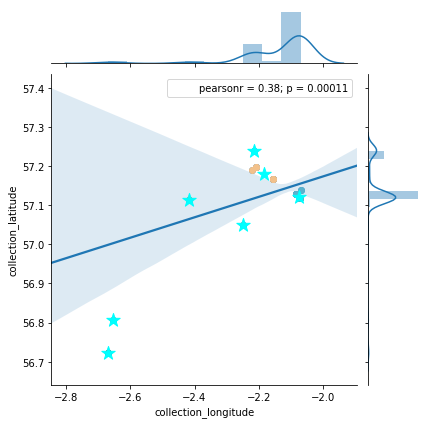

In [189]:
from random import randint
def ret_col():
    hello= ["1","2","3","4","5","6","7","8","9","a","b","c","e","d","f"]
    v="#"
    count=0
    for i in range(0,len(hello)):
        v=v+str(hello[randint(0,14)])
        count+=1
        if(count==6):
            #print(v)
            break
    return v

plt1 = sns.jointplot(x='collection_longitude', y='collection_latitude', data=df, kind='reg')
# col = ['yellow', 'green', 'red', 'blue', 'maroon', 'grey', 'black']
# col = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "#0000ff", 'yellow', 'green', 'red', 'blue', 'maroon', 'grey', 'black']
for i in range(0, len(v)):
    plt1.ax_joint.scatter(v[i][:, 0], v[i][:, 1], color = ret_col())
plt.scatter(centr[:, 0], centr[:, 1], marker='*', s=200, c='aqua')

In [195]:
date_time11 = []
date_time21 = []
date_time31 = []
geo_loc =[]
for i in range(0, len(vids)):
    date_time1 = {}
    date_time2 = {}
    date_time3 = {}
    geo_loc1 = []
   # print(len(vids))
    for j in range(0, len(vids[i])):
        date_time1.update({vids[i][j]: [df['collection_longitude'].iloc[vids[i][j]], df['collection_latitude'].iloc[vids[i][j]]]})
        date_time2.update({vids[i][j]: df['collection_date'].iloc[vids[i][j]]})
        date_time3.update({vids[i][j]: [df['collection_date'].iloc[vids[i][j]], df['size'].iloc[vids[i][j]]]})
        geo_loc1.append(df['collection_longitude'].iloc[vids[i][j]])
        geo_loc1.append(df['collection_latitude'].iloc[vids[i][j]])
        geo_loc1.append(df['delivery_longitude'].iloc[vids[i][j]])
        geo_loc1.append(df['delivery_latitude'].iloc[vids[i][j]])
       # geo_loc1.append(df['collection_longitude'].iloc[vids[i][j]])
        #date_time1.append(df['collection_date'].iloc[vids[i][j]])
    date_time11.append(date_time1)
    date_time21.append(date_time2)
    date_time31.append(date_time3)
    geo_loc.append(geo_loc1)
# date_time
date_time_sorted1 = []
date_time_sorted2 = []
date_time_sorted3 = []
geo_loc_sorted=[]
for diction in date_time11:
    sorted_x = sorted(diction.items(), key=operator.itemgetter(1))
    date_time_sorted1.append(sorted_x)
for diction in date_time21:
    sorted_y = sorted(diction.items(), key=operator.itemgetter(1))
    date_time_sorted2.append(sorted_y)
for diction in date_time31:
    sorted_z = sorted(diction.items(), key=operator.itemgetter(1))
    date_time_sorted3.append(sorted_z)

In [196]:
c=[]
b=[]
for i in date_time_sorted3:
    e={}
    for j in i:
        key = j[1][0]
       # print(key)
        if key not in e:
               e[key]=[]
        e[key].append(j[1][1])
    c.append(e)
#c
for diction in c:
    sorted_x = sorted(diction.items(), key=operator.itemgetter(0))
    #print(len(sorted_x))
    b.append(sorted_x)
    
g=[]
for i in range(0,len(date_time_sorted3)):
    for j in range(0,len(b[i])):
        g.append(b[i][j][1])
len(g)

14447

In [234]:
class Bin(object):
    """ Container for items that keeps a running sum """
    def __init__(self):
        self.items = []
        self.sum = 0

    def append(self, item):
        self.items.append(item)
        self.sum += item

    def __str__(self):
        """ Printable representation """
        return '(items=%s)' % (str(self.items))


def pack(values, maxValue):
    #values = sorted(values, reverse=True)
    bins = []

    for item in values:
        # Try to fit item into a bin
        for bin in bins:
            if bin.sum + item <= maxValue:
                #print 'Adding', item, 'to', bin
                bin.append(item)
                break
        else:
            # item didn't fit into any bin, start a new bin
            #print 'Making new bin for', item
            bin = Bin()
            bin.append(item)
            bins.append(bin)

    return bins


if __name__ == '__main__':
    import random

    def packAndShow(aList, maxValue):
        """ Pack a list into bins and show the result """
        #print ('List with sum', sum(aList), 'requires at least', (sum(aList)+maxValue-1)/maxValue, 'bins'0

        bins = pack(aList, maxValue)

        #print ('Total', len(bins), 'bins:')
        for bin in bins:
            #print (bin)

        #print
         return len(bins)


    #aList = [10,9,8,7,6,5,4,3,2,1]
    #packAndShow(aList, 11)

    #aList = [ random.randint(1, 11) for i in range(100) ]
    #packAndShow(aList, 11)  

n=0
for i in range(0,len(g)):
    aList= g[i]
    n+=packAndShow(aList,1)


In [235]:
n

53719

In [198]:
time=[]
for i in range(0,len(df)):
    time1={}
    time1.update({i: df['delivery_date'].iloc[i]})
    time.append(time1)
time

sort_time=[]
for diction in time:
    sort_t= sorted(diction.items(),key=operator.itemgetter(1))
    sort_time.append(sort_t)

In [114]:
new_dict={}
for i in sort_time:
    key=i[0][1]
    if key not in new_dict:
        new_dict[key]=[]
    new_dict[key].append([i[0][0],df['collection_longitude'].iloc[i[0][0]],df['collection_latitude'].iloc[i[0][0]]])


temp=[]
dictList = []

for key, value in new_dict.items():
    temp = [key,value]
    dictList.append(temp)
#dictList

In [83]:
#for i in dictist
#new_dict

In [199]:
vimal=[]
baghel=[]
for i in range(0,len(dictList)):
    vimal.append(dictList[i][1])
    k=len(dictList[i][1])
    anand={}
    for j in range(0,len(dictList[i][1])):
        anand.update({dictList[i][1][j][0]:[df['collection_longitude'].iloc[dictList[i][1][j][0]],df['collection_latitude'].iloc[dictList[i][1][j][0]]]})
    baghel.append(anand)

#baghel

In [200]:
dictList1 = []

for diction in baghel:
    sort_b=sorted(diction.items(),key=operator.itemgetter(1))
    dictList1.append(sort_b)
len(dictList1[0][0][1])
#dictList1

2

In [201]:
hello=[]
for i in range(0,len(dictList1)):
    #key=i[0][1]
    #print(key)
    #newr=[]
    new_time_cluster={}
    for j in range(0,len(dictList1[i])):
        key=dictList1[i][j][1][0]
        key1=dictList1[i][j][1][1]
        key3=str(key)+str(',')+str(key1)
        #print(key3)
        if key3 not in new_time_cluster:
             new_time_cluster[key3]=[]
        new_time_cluster[key3].append(df['size'].iloc[dictList1[i][j][0]])
    hello.append(new_time_cluster)
print(len(hello))
#hello


6387


In [202]:
temp1=[]
dictList2 = []

#for key, value in new_time_cluster.items():
#    temp1 = [key,value]
#    dictList2.append(temp1)
#len(dictList2)

for diction in hello:
    sort_l=sorted(diction.items(),key=operator.itemgetter(1))
    dictList2.append(sort_l)
dictList2

[[('-1.7933508999999503,57.48853799999999',
   [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]),
  ('-2.2142191000000366,57.2398058', [1.0])],
 [('-2.0819434999999658,57.1278956',
   [0.16666666666666666,
    0.16666666666666666,
    0.16666666666666666,
    0.16666666666666666,
    0.16666666666666666,
    0.16666666666666666]),
  ('-1.8129037999999584,57.4911509', [0.2, 0.2, 0.2, 0.2, 0.2])],
 [('-2.148702700000058,57.068941',
   [0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 1.0]),
  ('-2.2084755999999293,57.1965318', [1.0]),
  ('-2.197053699999969,57.2131249', [1.0]),
  ('-2.191424299999994,57.21071509999999', [1.0]),
  ('-2.1288414672017097,57.06853247184697', [1.0]),
  ('-2.1051478385925293,57.0908936611547', [1.0]),
  ('-2.0685625076293945,57.13987202575378', [1.0])],
 [('-2.087892399999987,57.12535159999999',
   [0.18181818181818185,
    0.18181818181818185,
    0.18181818181818185,
    0.18181818181818185,
    0.18181818181818185,
    0.1818181818181

In [119]:
#dictList2[0][3][1]

IndexError: list index out of range

In [203]:
n=0
for i in range(0,len(dictList2)):
    for j in range(0,len(dictList2[i])):
        aList= dictList2[i][j][1]
        p=bestFitDecreasing(aList,1)
        n=n+p

In [204]:
n

53692

In [205]:
from __future__ import division

def checkClass(k, a):
    for i in range(k, 1, -1):
        if (a > (1.0/i) and a <= (1.0/(i-1))):
            clas = (i-1)
            break
        else:
            clas = k
    return (clas-1)

def nextFit(weight, n, c):
    res = 1
    bin_rem = c
    for i in range(0, n):
        if (weight[i] > bin_rem):
            res = res + 1
            bin_rem = c - weight[i]
        else:
            bin_rem = bin_rem - weight[i]
    return res

def harmonic(items_normal, cap, k):
    items = [i/cap for i in items_normal]
    bins_k = [] #items divided n classes, list of list
    res_k = [] #bins required in every class
    for i in range(0, k):
        classes = [] #single list
        bins_k.append(classes)
    for item in items:
        clas = checkClass(k, item)
        bins_k[clas].append(item)
    for classes in bins_k:
        if (len(classes) != 0):
            bins = nextFit(classes, len(classes), 1)
        else:
            bins = 0
        res_k.append(bins)
        #print(classes)
    res = 0
    #print(bins_k)
    for i in bins_k:
        print(len(i))
    for r in res_k:
        res = res + r
    print(res_k)
    return res

In [206]:
n=0
for i in range(0,len(dictList2)):
    for j in range(0,len(dictList2[i])):
        aList= dictList2[i][j][1]
        p=harmonic(aList,1,4)
        n=n+p
n

0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
6
[0, 0, 0, 1]
0
0
0
5
[0, 0, 0, 1]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
22
[0, 0, 0, 5]
0
0
0
4
[0, 0, 0, 1]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
16
0
0
0
[16, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
6
0
0
[0, 3, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
18
0
0
0
[18, 0, 0, 0]
0
0
0
5
[0, 0, 0, 1]
0
4
0
0
[0, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
4
0
0
0


0
0
[1, 0, 0, 0]
0
20
0
0
[0, 10, 0, 0]
1
0
0
0
[1, 0, 0, 0]
6
0
0
0
[6, 0, 0, 0]
0
2
0
4
[0, 1, 0, 1]
6
0
0
0
[6, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
24
0
0
0
[24, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
12
0
[0, 0, 4, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
22
0
0
0
[22, 0, 0, 0]
49
0
0
0
[49, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
0
56
0
[0, 0, 19, 0]
0
0
6
0
[0, 0, 2, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
11
0
0
0
[11, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
3
0
[1, 1, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0


0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
0
3
4
[0, 0, 1, 1]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
33
0
[0, 0, 11, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
10
0
0
[0, 5, 0, 0]
0
2
0
0
[0, 1, 0, 0]
6
0
0
0
[6, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
4
0
0
[4, 2, 0, 0]
0
0
0
5
[0, 0, 0, 1]
0
0
0
4
[0, 0, 0, 1]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
24
0
0
[1, 12, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
4
[0, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
10
0
0
[0, 5, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
14
8
0
0
[14, 4, 0, 0]
1
0
0
0
[

0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
8
0
0
0
[8, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
0
0
12
0
[0, 0, 4, 0]
6
0
0
0
[6, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
36
0
0
0
[36, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
15
0
0
0
[15, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
0
0
0
16
[0, 0, 0, 4]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[

0
0
0
[1, 0, 0, 0]
0
0
30
0
[0, 0, 10, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
10
[0, 0, 0, 2]
2
0
0
8
[2, 0, 0, 2]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
4
0
0
[0, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
15
0
0
0
[15, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
12
0
0
0
[12, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0


0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
7
[0, 1, 0, 1]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
3
0
[0, 1, 1, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
0
0
7
[0, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
5
2
0
0
[5, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
12
0
0
0
[12, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
10
0
0
0
[10, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
11
[0, 0, 0, 2]
0
0
0
4
[0, 0, 0, 1]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
0
0
18
[0, 0, 0, 5]
0
0
0
4
[0, 0, 0, 1]
0
0
9
0
[0, 0, 3, 0]
0
2
0
0
[0, 1, 0, 0]
0
4
0
0
[0, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0

1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
6
2
0
0
[6, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
0
8
0
0
[0, 4, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
7
[0, 0, 0, 1]
0
0
14
0
[0, 0, 5, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
14
4
0
0
[14, 2, 0, 0]
12
0
0
0
[12, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0


30
0
0
0
[30, 0, 0, 0]
0
0
0
10
[0, 0, 0, 1]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
5
0
0
0
[5, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
16
0
0
0
[16, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
25
0
0
0
[25, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
6
0
[1, 0, 2, 0]
2
0
0
0
[2, 0, 0, 0]
0
0
12
0
[0, 0, 4, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
12
0
0
0
[12, 0, 0, 0]
0
0
0
18
[0, 0, 0, 5]
0
2
0
0
[0, 1, 0, 0]
0
8
0
0
[0, 4, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
6
22
0
0
[6, 11, 0, 0]
0
24
0
0
[0, 12, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
4
0
0
[0, 2, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0

0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
0
0
10
[0, 0, 0, 2]
0
0
3
0
[0, 0, 1, 0]
0
0
3
0
[0, 0, 1, 0]
0
10
0
0
[0, 5, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
3
0
[1, 0, 1, 0]
81
0
0
0
[81, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
0
0
7
0
[0, 0, 3, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
2
0
0
[4, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
3
0
0
0
[3, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
8
0
0
[4, 4, 0, 0]
0
0
0
6
[0, 0, 0, 1]
0
0
0
6
[0, 0, 0, 1]
0
0
0
4
[0, 0, 0, 1]
0
0
33
0
[0, 0, 11, 0]
0
0
3
0
[0, 0, 1, 0]
0
21
0
0
[0, 11, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
18
0
0
[0, 9, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0


0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
16
0
0
0
[16, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
2
0
0
[2, 1, 0, 0]
4
0
0
0
[4, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
12
8
0
0
[12, 4, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
3
0
[1, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
10
0
0
[2, 5, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
0
38
0
0
[0, 19, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1

0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
8
0
0
[0, 4, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
29
[0, 0, 0, 5]
0
0
0
36
[0, 0, 0, 9]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
7
[0, 0, 0, 1]
0
0
14
0
[0, 0, 5, 0]
0
10
0
0
[0, 5, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
6
[0, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
12
[0, 0, 0, 2]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 

[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
6
0
0
0
[6, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
10
0
0
[0, 5, 0, 0]
0
2
3
0
[0, 1, 1, 0]
6
0
0
0
[6, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
7
0
0
0
[7, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
3
0
[3, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
7
0
0
0
[7, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
7
0
[1, 0, 3, 0]
0
8
0
0
[0, 4, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]

0
0
[6, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
14
0
[0, 0, 5, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
18
0
0
[0, 9, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
27
0
0
0
[27, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
0
0
4
[0, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0

1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
0
3
0
[0, 0, 1, 0]
0
0
6
0
[0, 0, 2, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
14
0
[0, 0, 5, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
4
0
0
[0, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
3
0
[4, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
16
0
0
0
[16, 0, 0, 0]
0
0
0
6
[0, 0, 0, 1]
0
0
14
0
[0, 0, 5, 0]
0
0
3
0
[0, 0, 1, 0]
0
0
3
0
[0, 0, 1, 0]
0
0
12
0
[0, 0, 4, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
8
[0, 0, 0, 2]
0
0
3
0
[0, 0, 1, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
34
0
0
0
[34, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
2
0


[3, 0, 0, 0]
0
0
0
4
[0, 0, 0, 1]
0
0
0
4
[0, 0, 0, 1]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
0
4
0
0
[0, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
12
0
[0, 0, 4, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
6
0
0
0
[6, 0, 0, 0]
0
0
14
0
[0, 0, 5, 0]
0
4
0
0
[0, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
4
[0, 0, 0, 1]
0
10
0
0
[0, 5, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 

[12, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
0
12
0
[0, 0, 4, 0]
0
44
0
0
[0, 22, 0, 0]
0
2
0
0
[0, 1, 0, 0]
4
0
0
0
[4, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
0
4
0
0
[0, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
22
[0, 0, 0, 3]
0
0
0
4
[0, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
10
0
0
0
[10, 0, 0, 0]
0
0
18
0
[0, 0, 6, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
25
0
0
0
[25,

0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
5
[0, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
10
0
0
0
[10, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
12
0
[0, 0, 4, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
17
[0, 0, 0, 5]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 

0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
0
0
0
4
[0, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
6
0
0
0
[6, 0, 0, 0]
16
0
0
0
[16, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
4
[0, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
16
[0, 0, 0, 4]
0
0
3
0
[0, 0, 1, 0]
0
70
0
0
[0, 35, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
4
[0, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
8
0
0
[0, 4, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
0
4
0
0
[0, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
0
27
0
[0, 0, 9, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0

0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
10
8
0
0
[10, 4, 0, 0]
0
0
0
5
[0, 0, 0, 1]
0
21
0
0
[0, 11, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
8
4
3
0
[8, 2, 1, 0]
2
0
0
0
[2, 0, 0, 0]
0
0
0
7
[0, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
0
0
12
0
[0, 0, 4, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 

0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
8
0
0
0
[8, 0, 0, 0]
0
39
0
0
[0, 20, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
4
[0, 0, 0, 1]
0
0
6
8
[0, 0, 2, 2]
0
0
12
0
[0, 0, 4, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
12
0
0
0
[12, 0, 0, 0]
24
2
0
0
[24, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
9
2
0
0
[9, 1, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
2
0
0
[0, 1, 0, 0]
0
12
0
0
[0, 6, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[

2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
63
0
0
0
[63, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
16
0
0
0
[16, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
6
[0, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
4
[0, 0, 0, 1]
0
0
28
0
[0, 0, 10, 0]
0
0
3
0
[0, 0, 1, 0]
0
0
6
0
[0, 0, 2, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
6
0
0
0
[6, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
50
0
0
0
[50, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
0
10
0
0
[0, 5, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
0
0
0
16
[0, 0, 0, 4]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
56
0
0
0
[56, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
18
[0, 0, 0, 5]
1


0
14
0
[0, 0, 5, 0]
1
0
14
0
[1, 0, 5, 0]
0
0
3
0
[0, 0, 1, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
0
0
0
8
[0, 0, 0, 1]
0
2
0
0
[0, 1, 0, 0]
6
0
0
0
[6, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
12
[1, 0, 0, 2]
1
0
0
13
[1, 0, 0, 4]
1
0
0
4
[1, 0, 0, 1]
2
0
0
0
[2, 0, 0, 0]
0
0
0
36
[0, 0, 0, 9]
2
78
0
0
[2, 39, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
4
0
0
[0, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
20
0
0
0
[20, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
18
[0, 0, 0, 5]
0
2
0
18
[0, 1, 0, 5]
0
0
127
0
[0, 0, 43, 0]
0
0
3
0
[0, 0, 1, 0]
0
10
0
0
[0, 5, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]


1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
4
0
0
[0, 2, 0, 0]
0
2
0
0
[0, 1, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
14
0
[0, 0, 5, 0]
0
0
12
0
[0, 0, 4, 0]
0
10
0
0
[0, 5, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
0
12
0
[0, 0, 4, 0]
0
0
12
0
[0, 0, 4, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
18
[0, 0, 0, 5]
0
0
0
64
[0, 0, 0, 16]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
0
0
4
[0, 0, 0, 1]
0
0
33
0
[0, 0, 11, 0]
10
0
0
0
[10, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
20
0
0
0
[20, 0, 0, 0]

1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
10
0
0
[0, 5, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
6
0
0
0
[6, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
12
0
0
0
[12, 0, 0, 0]
7
0
0
0
[7, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
7
[0, 0, 0, 1]
0
0
0
4
[0, 0, 0, 1]
0
0
0
4
[0, 0, 0, 1]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
16
0
0
[0, 8, 0, 0]
0
0
0
98
[0, 0, 0, 17]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
0
32
0
[0, 0, 11, 0]
6
0
0
0
[6, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
21
0
[0, 0, 7, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0


[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
10
2
0
0
[10, 1, 0, 0]
0
33
0
0
[0, 17, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
16
0
0
0
[16, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
2
0
0
[4, 1, 0, 0]
26
0
0
0
[26, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
2
0
0
[3, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
0
0
0
9
[0, 0, 0, 2]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
8
[0, 0, 0, 1]
6
0
0
0
[6, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0

[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
2
0
0
[2, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
0
6
0
[0, 0, 2, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
8
0
0
[0, 4, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
6
0
0
0
[6, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
0
0
0
17
[0, 0, 0, 4]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
2
0
0
[2, 1, 0, 0]
3
0
0
0
[3, 0, 0, 0]
0
0
0
16
[0, 0, 0, 4]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0

0
[0, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
18
0
0
0
[18, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
3
0
0
0
[3, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
0
0
52
0
[0, 0, 18, 0]
0
18
0
0
[0, 9, 0, 0]
3
0
6
0
[3, 0, 2, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
39
[0, 0, 0, 10]
0
0
0
4
[0, 0, 0, 1]
1
0
12
0
[1, 0, 4, 0]
6
0
0
0
[6, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
100
0
0
0
[100, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0

0
[7, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
10
0
0
[0, 5, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
4
0
0
[1, 2, 0, 0]
0
0
0
15
[0, 0, 0, 3]
0
0
0
56
[0, 0, 0, 14]
0
0
0
4
[0, 0, 0, 1]
0
0
14
0
[0, 0, 5, 0]
1
0
14
0
[1, 0, 5, 0]
0
0
95
0
[0, 0, 32, 0]
0
0
3
0
[0, 0, 1, 0]
0
10
0
0
[0, 5, 0, 0]
0
18
0
0
[0, 9, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
16
0
0
0
[16, 0, 0, 0]
0
0
19
0
[0, 0, 7, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
2
0
0
[0, 1, 0, 0]
4
2
0
0
[4, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
9
0
0
0
[9, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
150
0
[0, 0, 50, 0]
0
0
168
0
[0, 0, 56, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]


0
0
[1, 0, 0, 0]
16
0
0
0
[16, 0, 0, 0]
0
10
0
0
[0, 5, 0, 0]
35
0
0
0
[35, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
16
0
0
0
[16, 0, 0, 0]
49
0
0
0
[49, 0, 0, 0]
0
10
0
0
[0, 5, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
4
[0, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
4
[0, 0, 0, 1]
0
0
14
0
[0, 0, 5, 0]
0
0
14
0
[0, 0, 5, 0]
0
0
14
0
[0, 0, 5, 0]
0
0
12
0
[0, 0, 4, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
7
0
[0, 0, 3, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
0
0
0
39
[0, 0, 0, 10]
0
0
12
0
[0, 0, 4, 0]


0
0
[0, 1, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
16
[0, 0, 0, 4]
0
0
6
0
[0, 0, 2, 0]
1
0
0
0
[1, 0, 0, 0]
121
0
0
0
[121, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
10
[0, 0, 1, 2]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
10
0
0
0
[10, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
12
0
0
0
[12, 0, 0, 0]
1
4
0
0
[1, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
0
0
0
49
[0, 0, 0, 8]
0
2
0
0
[0, 1, 0, 0]
0
8
0
0
[0, 4, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
5
0
0
0
[5, 0, 0, 0]
16
0
0
0
[16, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
21
0
[0, 0, 7, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
5
[0, 0, 0, 1]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2

0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
0
4
0
0
[0, 2, 0, 0]
1
4
0
0
[1, 2, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
22
[0, 0, 0, 5]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
0
30
0
[0, 0, 10, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
4
0
0
0
[4, 0, 0, 0]
0
4
0
0
[0, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
25
0
0
0
[25, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0

0
0
20
[0, 0, 0, 4]
0
0
14
0
[0, 0, 5, 0]
0
0
3
0
[0, 0, 1, 0]
10
2
0
0
[10, 1, 0, 0]
0
0
6
0
[0, 0, 2, 0]
5
0
0
0
[5, 0, 0, 0]
5
0
0
0
[5, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
25
0
0
0
[25, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
7
0
0
0
[7, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
0
24
0
0
[0, 12, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
12
0
[0, 0, 4, 0]
2
0
0
0
[2, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
0
102
0
0
[0, 51, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
3
2
0
0
[3, 1, 0, 0]
0
0
0
24
[0, 0, 0, 4]
0
0
60
0
[0, 0, 20, 0]
5
0
0
0
[5, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
0
20
0
0
[0, 10, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
4
2
0
0
[4, 1, 0, 0]
2
2
0
0
[2, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0

1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
10
2
0
0
[10, 1, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
2
3
0
[1, 1, 1, 0]
0
0
0
10
[0, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
25
0
0
0
[25, 0, 0, 0]
0
0
0
5
[0, 0, 0, 1]
0
0
0
5
[0, 0, 0, 1]
0
0
3
0
[0, 0, 1, 0]
0
10
0
0
[0, 5, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
2
6
0
0
[2, 3, 0, 0]
2
0
0
0
[2, 0, 0, 0]
100
0
0
0
[100, 0, 0, 0]
2
4
0
0
[2, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
190
0
0
0
[190, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
16
0
0
0
[16, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
0
0
4
[0, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 

0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
4
0
0
0
[4, 0, 0, 0]
36
0
0
0
[36, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
5
2
0
0
[5, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
2
0
0
[3, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
16
[0, 0, 0, 4]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
6
0
0
[0, 3, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
9
0
0
0
[9

[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
49
0
0
0
[49, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
0
0
0
4
[0, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
0
0
12
0
[0, 0, 4, 0]
3
0
0
0
[3, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
2
2
0
0
[2, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
6
0
[0, 0, 2, 0]
0
2
0
0
[0, 1, 0, 0]
0
4
0
0
[0, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
45
0
[0, 0, 15, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
0
0
4
[0, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
5
4
3
0
[5, 2, 1, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
12
0
[0, 0, 

[1, 0, 0, 0]
5
0
0
0
[5, 0, 0, 0]
0
0
60
0
[0, 0, 20, 0]
0
10
0
0
[0, 5, 0, 0]
0
10
0
0
[0, 5, 0, 0]
0
32
0
0
[0, 16, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
5
0
0
[0, 3, 0, 0]
16
0
0
0
[16, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
2
0
0
[3, 1, 0, 0]
6
0
0
0
[6, 0, 0, 0]
6
0
0
0
[6, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
15
0
0
0
[15, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
70
0
0
[0, 35, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
16
[0, 0, 0, 4]
0
0
0
36
[0, 0, 0, 9]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0

0
[5, 0, 0, 0]
0
0
0
6
[0, 0, 0, 1]
0
0
85
0
[0, 0, 29, 0]
0
0
3
0
[0, 0, 1, 0]
0
0
12
0
[0, 0, 4, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
16
0
0
0
[16, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
9
0
0
0
[9, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
12
0
0
[0, 6, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
21
0
0
[0, 11, 0, 0]
0
2
0
0
[0, 1, 0, 0]
6
0
0
0
[6, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
4
0
0
[0, 2, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
6
0
0
0
[6, 0, 0, 0]
20
0
0
0
[20, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
0
3
0
[0, 0, 1, 0]
0
0
12
0
[0, 0, 4, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
0
2
0
0


0
[0, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
0
0
4
[0, 0, 0, 1]
0
0
3
0
[0, 0, 1, 0]
0
0
12
0
[0, 0, 4, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
0
0
0
20
[0, 0, 0, 4]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
2
0
0
[2, 1, 0, 0]
4
0
0
0
[4, 0, 0, 0]
0
4
0
0
[0, 2, 0, 0]
6
0
0
0
[6, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
289
0
0
0
[289, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
0
0
18
[0, 0, 0, 3]
0
0
0
18
[0, 0, 0, 5]
0
0
3
0
[0, 0, 1, 0]
0
18
0
0
[0, 9, 0, 0]
0
0
12
0
[0, 0, 4, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
4
[0, 0, 0, 1]
0
5
0
0
[0, 3, 0, 0]
0
4
0
0
[0, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
11
6
0
0
[11, 3, 0, 0]
25
0
0


53717

In [136]:
##try###############################################################################################################################################################
#########################################################################################################################
#######################################################################################################

In [212]:
date_time11 = []
date_time21 = []
date_time31 = []
geo_loc =[]
for i in range(0, len(vids)):
    date_time1 = {}
    date_time2 = {}
    date_time3 = {}
    geo_loc1 = []
   # print(len(vids))
    for j in range(0, len(vids[i])):
        date_time1.update({vids[i][j]: [df['collection_longitude'].iloc[vids[i][j]], df['collection_latitude'].iloc[vids[i][j]]]})
        date_time2.update({vids[i][j]: df['collection_date'].iloc[vids[i][j]]})
        date_time3.update({vids[i][j]: [df['collection_date'].iloc[vids[i][j]], df['size'].iloc[vids[i][j]]]})
        geo_loc1.append(df['collection_longitude'].iloc[vids[i][j]])
        geo_loc1.append(df['collection_latitude'].iloc[vids[i][j]])
        geo_loc1.append(df['delivery_longitude'].iloc[vids[i][j]])
        geo_loc1.append(df['delivery_latitude'].iloc[vids[i][j]])
       # geo_loc1.append(df['collection_longitude'].iloc[vids[i][j]])
        #date_time1.append(df['collection_date'].iloc[vids[i][j]])
    date_time11.append(date_time1)
    date_time21.append(date_time2)
    date_time31.append(date_time3)
    geo_loc.append(geo_loc1)
# date_time
date_time_sorted1 = []
date_time_sorted2 = []
date_time_sorted3 = []
geo_loc_sorted=[]
for diction in date_time11:
    sorted_x = sorted(diction.items(), key=operator.itemgetter(1))
    date_time_sorted1.append(sorted_x)
for diction in date_time21:
    sorted_y = sorted(diction.items(), key=operator.itemgetter(1))
    date_time_sorted2.append(sorted_y)
for diction in date_time31:
    sorted_z = sorted(diction.items(), key=operator.itemgetter(1))
    date_time_sorted3.append(sorted_z)
date_time_sorted2
#len(date_time_sorted2[1])

[[(20171, Timestamp('2016-08-19 08:00:00')),
  (20172, Timestamp('2016-08-19 08:00:00')),
  (20173, Timestamp('2016-08-19 08:00:00')),
  (20174, Timestamp('2016-08-19 08:00:00')),
  (8300, Timestamp('2016-08-19 12:00:00')),
  (8301, Timestamp('2016-08-19 12:00:00')),
  (9541, Timestamp('2016-08-19 14:00:00')),
  (9542, Timestamp('2016-08-19 14:00:00')),
  (9543, Timestamp('2016-08-19 14:00:00')),
  (9544, Timestamp('2016-08-19 14:00:00')),
  (9545, Timestamp('2016-08-19 14:00:00')),
  (15189, Timestamp('2016-08-19 14:00:00')),
  (15190, Timestamp('2016-08-19 14:00:00')),
  (15191, Timestamp('2016-08-19 14:00:00')),
  (15192, Timestamp('2016-08-19 14:00:00')),
  (15193, Timestamp('2016-08-19 14:00:00')),
  (18847, Timestamp('2016-08-19 14:00:00')),
  (18848, Timestamp('2016-08-19 14:00:00')),
  (18849, Timestamp('2016-08-19 14:00:00')),
  (18850, Timestamp('2016-08-19 14:00:00')),
  (18851, Timestamp('2016-08-19 14:00:00')),
  (9880, Timestamp('2016-08-20 07:00:00')),
  (9881, Timestamp

In [213]:
l = []
for i in date_time_sorted2:
    d = {}
    for j in i:
        key = j[1]
        d.setdefault(key, []).append(j[0])
    l.append(d)
# print(l)
ctr = 0
for i in range(len(l)):
    #print('new location cluster')
    ctr += 1
    for j in l[i]:
        #print('new time cluster')
        ctr += 1
        #print(l[i][j])
        for k in range(len(l[i][j])):
            ctr += 1
#             print(l[i][j][k])
#             pass
print(ctr)


96125


In [215]:
li = []
for i in l:
    sorted_i = sorted(i.items(), key=operator.itemgetter(0))
    li.append(sorted_i)

class Bin(object):
    """ Container for items that keeps a running sum """
    def __init__(self):
        self.items = []
        self.sum = 0

    def append(self, item):
        self.items.append(item)
        self.sum += item

    def __str__(self):
        """ Printable representation """
        return '(items=%s)' % (str(self.items))


def bestFitDecreasing(values, maxValue):
    values = sorted(values, reverse=True)
    bins = []

    for item in values:
        # Try to fit item into a bin
        for bin in bins:
            if bin.sum + item <= maxValue:
                #print 'Adding', item, 'to', bin
                bin.append(item)
                break
        else:
            # item didn't fit into any bin, start a new bin
            #print 'Making new bin for', item
            bin = Bin()
            bin.append(item)
            bins.append(bin)

    return len(bins)
# li
li

[[(Timestamp('2016-08-19 08:00:00'), [20171, 20172, 20173, 20174]),
  (Timestamp('2016-08-19 12:00:00'), [8300, 8301]),
  (Timestamp('2016-08-19 14:00:00'),
   [9541,
    9542,
    9543,
    9544,
    9545,
    15189,
    15190,
    15191,
    15192,
    15193,
    18847,
    18848,
    18849,
    18850,
    18851]),
  (Timestamp('2016-08-20 07:00:00'),
   [9880,
    9881,
    9882,
    9883,
    9884,
    9885,
    9886,
    9887,
    9888,
    9889,
    9890,
    9891,
    9892,
    9893,
    9894,
    9895,
    9896,
    9897,
    9898,
    9899,
    9900,
    9901,
    9902,
    9903,
    9904,
    9905,
    9906,
    9907,
    9908,
    9909,
    9910,
    9911,
    9912,
    9913,
    9914,
    9915,
    9916,
    9917,
    9918,
    9919,
    9920,
    9921,
    9922,
    9923,
    9924,
    9925,
    19453,
    19454,
    19455,
    19456,
    19457,
    19458,
    19459,
    19460,
    19461,
    19462,
    19463,
    19464,
    19465,
    19466,
    19467,
    19468,
    1946

In [219]:
d = []
for i in li:
    d1 = []
    for j in i:
        temp = j[1]
        d2 = []
        for k in j[1]:
            d2.append(df['size'].iloc[k])
        d1.append(d2)
    d.append(d1)
# print(d)
bins = 0
for i in d:
    for j in i:
        # print(j)
        bins += bestFitDecreasing(j,1)
print(bins)

53597


In [229]:
len(g)

14447

In [237]:
vids

[array([   77,   565,   571, ..., 81330, 81333, 81649], dtype=int64),
 array([  629,   682,   736, ..., 81556, 81578, 81641], dtype=int64),
 array([   31,    75,    92, ..., 81426, 81435, 81454], dtype=int64),
 array([    8,     9,    10, ..., 81587, 81607, 81640], dtype=int64),
 array([  595,   604,   647, ..., 81096, 81229, 81253], dtype=int64),
 array([    1,     2,     3, ..., 81632, 81633, 81642], dtype=int64),
 array([    0,    26,    27, ..., 81668, 81669, 81670], dtype=int64)]